In [1]:
#### Credit : Thanks to JCharisTech & J-Secur1ty
# Jesus Saves @JCharisTech
# Jesse E.Agbe(JCharis)
# J-Secur1ty
# https://youtu.be/iHAbGg523UQ
# Time Series Analysis with Facebook's Prophet

### Time Series Analysis in Python with FaceBook Prophet
+ Time series : Time series analysis is the collection of data at specific intervals over a period of time, 
+  With the purpose of identifying trends, cycles, and seasonal variances to aid in the forecasting of a future event.

#### Applications
+ To identify trends or patterns
+ To identify seasonal changes and cycles
+ To understand the past in order to predict the future
+ For forecasting future events,outcomes 
- Ex
  -useful for forecasting market for products that fluctuate seasonally, such as commodities and clothing retail businesses
  - For stock rise or fall predictions
  - 
  
![](timeseries_patterns.jpeg)
 
 
#### Packages
+ pandas
+ statsmodel
+ fbprophet
+ pmprophet
+ pyflux

#### Installing
+ pip install pystan
+ pip install fbprophet
+ conda install -c conda-forge fbprophet


![](facebookprophet.png)

### Reformat Data to set dates as index
+ Method 1: When Reading the File
    - pd.read_csv('dataset.csv',parse_dates=['Dates'],index_col='Dates')
+ Method 2 : Using set_index 
    - df.set_index(pd.DatetimeIndex(df['Dates']))

In [2]:
# Load EDA Pkgs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load Our Dataset
df = pd.read_csv("flights_data.csv")

In [4]:
df.head()

,Dates,no_of_flights
0,2005-01-01,594924
1,2005-02-01,545332
2,2005-03-01,617540
3,2005-04-01,594492
4,2005-05-01,614802


In [5]:
# Shape of Dataset
df.shape

(36, 2)

In [6]:
# Quick Profiling
import pandas_profiling as pp

In [7]:
# Generate A Profile Report
pp.ProfileReport(df)

#### Check to See if our dataset is Stationary
+ Visual Plot Test
+ Summary of Stats
+ AD Fuller Test(null)
    - determine the presence of unit root in the series
    - null hypothesis and alternate hypothesis
    - test stats < critical value is stationary 
+ KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin)

<AxesSubplot:>

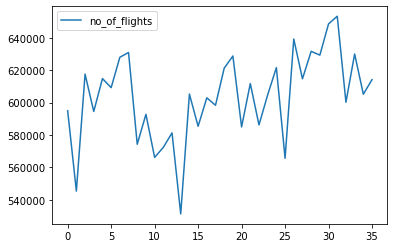

In [8]:
# Plot Test
df.plot()

<AxesSubplot:ylabel='Frequency'>

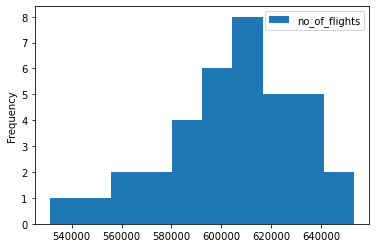

In [9]:
# Histogram
df.plot(kind="hist")

#### Narrative
+ Not a gaussian bell curve not stationary

### Summary Stats
+ Split
+ Find mean and variance of each

In [10]:
df.shape

(36, 2)

In [11]:
df.columns

Index(['Dates', 'no_of_flights'], dtype='object')

In [12]:
# Create A Series
X = df['no_of_flights'].values

In [13]:
# Split our dataset
len(X)/2

18.0

In [14]:
X1, X2 = X[0:18], X[18:]

In [15]:
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1={}, mean2={}'.format(mean1, mean2))
print('variance1={}, variance2={}'.format(var1, var2))

mean1=591385.1111111111, mean2=616155.6111111111
variance1=667492396.6543211, variance2=485281695.4598766


#### Narrative
+ Not Stationary since the variance are not in the same range

### Augment Dickey Fuller Test


In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
def adf_test(timeseries):
    print ('Results of Aug. Dickey-Fuller Test:')
    df_test = adfuller(timeseries, autolag='AIC')
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in df_test[4].items():
       df_output['Critical Value {}'.format(key)] = value
    print (df_output)

In [18]:
adf_test(df['no_of_flights'])

Results of Aug. Dickey-Fuller Test:
Test Statistic                 -0.693138
p-value                         0.848519
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value 1%              -3.723863
Critical Value 5%              -2.986489
Critical Value 10%             -2.632800
dtype: float64


#### Narrative
+ Test Stats is -0.69 which is greater than Critical Value at all point hence it is not 
+ Not Stationary

In [19]:
def is_stationary(stats,critical_value):
    if stats < critical_value == True:
        print("Stationary")
    else:
        print("Not Stationary")

In [20]:
is_stationary(-0.693138,-3.723863)

Not Stationary


#### KPSS Test
+ Opposite of AD Fuller

In [21]:
# Load Pkg
from statsmodels.tsa.stattools import kpss

In [22]:
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value {}'.format(key)] = value
    print (kpss_output)

In [23]:
kpss_test(df['no_of_flights'])

Results of KPSS Test:
Test Statistic          0.333669
p-value                 0.100000
Lags Used              10.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64


C:\Users\dongh\AppData\Local\Continuum\anaconda3\envs\fbprophet\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\dongh\AppData\Local\Continuum\anaconda3\envs\fbprophet\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


#### Narrative
+ If test is greater than critical value it is stationary

In [24]:
def is_stationary_kpss(stats,critical_value):
    if stats > critical_value == True:
        print("Stationary")
    else:
        print("Not Stationary")

In [25]:
is_stationary_kpss(0.333669,0.347000)

Not Stationary


### How to Make it Stationary
+ Difference 
    - df.diff
    - yt = yt -y(t-1)
    - df['diff'] = df['a'] - df['a'].shift(1)
+ Log Transformation :to stabilize the non consistence values
    - using numpy.log()

<AxesSubplot:>

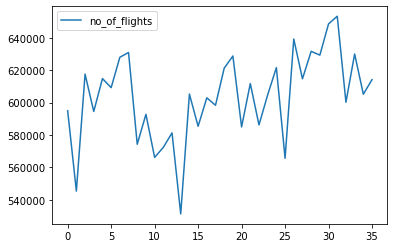

In [26]:
df.plot()

In [27]:
df2 = df

In [28]:
# Reformat
df2.set_index(pd.DatetimeIndex(df2['Dates']))

,Dates,no_of_flights
Dates,,
2005-01-01,2005-01-01,594924
2005-02-01,2005-02-01,545332
2005-03-01,2005-03-01,617540
2005-04-01,2005-04-01,594492
2005-05-01,2005-05-01,614802
2005-06-01,2005-06-01,609195
2005-07-01,2005-07-01,627961
2005-08-01,2005-08-01,630904
2005-09-01,2005-09-01,574253


In [29]:
df2.columns

Index(['Dates', 'no_of_flights'], dtype='object')

In [30]:
df2 = df2.drop('Dates',axis=1)

<AxesSubplot:>

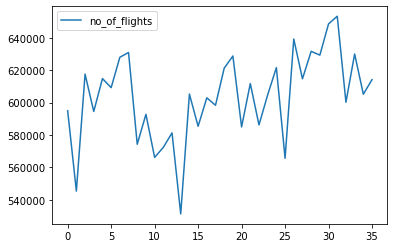

In [31]:
df2.plot()

In [32]:
df2.columns

Index(['no_of_flights'], dtype='object')

### Method 1 :Differencing To Fix Non Stationary Dataset

In [33]:
# Differencing To Fix Non Stationary Dataset
df2['no_of_flights'] = df2['no_of_flights'] - df2['no_of_flights'].shift(1)

<AxesSubplot:>

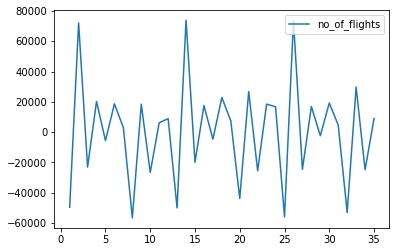

In [34]:
df2.plot()

In [35]:
### Using Pandas Diff on Dataset with DatetimeIndex
df_diff = df2.diff(periods=1)

<AxesSubplot:>

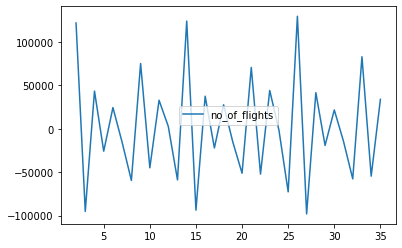

In [36]:
df_diff.plot()

<AxesSubplot:ylabel='Frequency'>

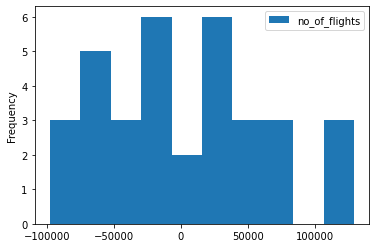

In [37]:
df_diff.plot(kind='hist')

#### Narrative
+ Our Dataset is now stationary

###  Method 2 : Log Transform

In [38]:
# Load Pkgs
import numpy as np

In [39]:
df3 = df

In [40]:
X2 = df3['no_of_flights']

In [41]:
trans_df = np.log(X2)

<AxesSubplot:>

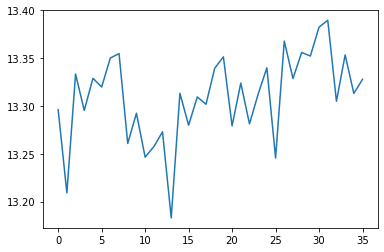

In [42]:
trans_df.plot()

### Decompose our Dataset 
+ To Find Trends,Seasonality


In [43]:
# Load Stats Pkgs
import statsmodels.api as sm

In [44]:
df_n = pd.read_csv('flights_data.csv',parse_dates=['Dates'],index_col='Dates')

In [45]:
df_n.head()

,no_of_flights
Dates,
2005-01-01,594924
2005-02-01,545332
2005-03-01,617540
2005-04-01,594492
2005-05-01,614802


In [46]:
# Set Date Col to Index
df_n.dtypes

no_of_flights    int64
dtype: object

In [47]:
# Makes it Easier to Manipulate by Time/Date
df_n['2005']

,no_of_flights
Dates,
2005-01-01,594924
2005-02-01,545332
2005-03-01,617540
2005-04-01,594492
2005-05-01,614802
2005-06-01,609195
2005-07-01,627961
2005-08-01,630904
2005-09-01,574253


In [48]:
# We Can select by range of years
df_n['2005':'2006']

,no_of_flights
Dates,
2005-01-01,594924
2005-02-01,545332
2005-03-01,617540
2005-04-01,594492
2005-05-01,614802
2005-06-01,609195
2005-07-01,627961
2005-08-01,630904
2005-09-01,574253


<AxesSubplot:xlabel='Dates'>

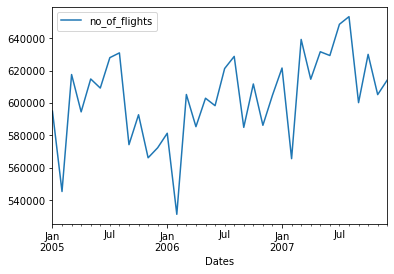

In [49]:
# Good Plot
df_n.plot()

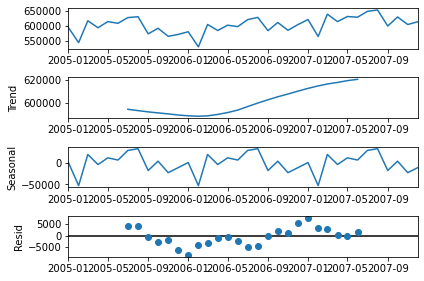

In [50]:
#### Decomposition Plot
decomposition = sm.tsa.seasonal_decompose(df_n, model='additive')
fig = decomposition.plot()

### Intro To Facebook Prophet
+ Steps
    - Initialize Model :: Prophet()
    - Set columns as ds,y
    - Fit dataset :: Prophet().fit()
    - Create Dates To predict :: Prophet().make_future_dataframe(periods=365)
    - Predict :: Prophet().predict(future_dates)  
    - Plot :: Prophet().plot(predictions)

In [51]:
df_n

,no_of_flights
Dates,
2005-01-01,594924
2005-02-01,545332
2005-03-01,617540
2005-04-01,594492
2005-05-01,614802
2005-06-01,609195
2005-07-01,627961
2005-08-01,630904
2005-09-01,574253


<AxesSubplot:xlabel='Dates'>

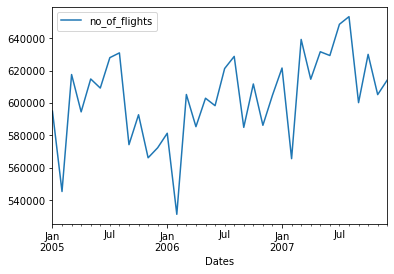

In [52]:
# Plot
df_n.plot()

In [53]:
# Make it stationary
sdf = df_n.diff(periods=1)

<AxesSubplot:xlabel='Dates'>

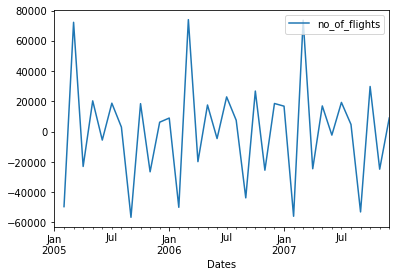

In [54]:
sdf.plot()

### Building Model

In [55]:
# load Timeseries Pkgs
from fbprophet import Prophet

In [56]:
# Initialize the Model
m = Prophet()

#### Parameters
+ growth: linear/logistic
+ seasonality:additive/multiplicative
+ holidays:
+ changepoint:

In [57]:
sdf

,no_of_flights
Dates,
2005-01-01,NaN
2005-02-01,-49592.0
2005-03-01,72208.0
2005-04-01,-23048.0
2005-05-01,20310.0
2005-06-01,-5607.0
2005-07-01,18766.0
2005-08-01,2943.0
2005-09-01,-56651.0


In [58]:
# Make the index as ds
sdf['ds'] = sdf.index

In [59]:
sdf.columns

Index(['no_of_flights', 'ds'], dtype='object')

In [60]:
# Works with a ds and y column names
sdf.rename(columns={'ds':'ds','no_of_flights':'y'},inplace=True)

In [61]:
sdf.head()

,y,ds
Dates,,
2005-01-01,NaN,2005-01-01
2005-02-01,-49592.0,2005-02-01
2005-03-01,72208.0,2005-03-01
2005-04-01,-23048.0,2005-04-01
2005-05-01,20310.0,2005-05-01


In [62]:
new_df = sdf[['ds','y']]

In [63]:
new_df.head()

,ds,y
Dates,,
2005-01-01,2005-01-01,NaN
2005-02-01,2005-02-01,-49592.0
2005-03-01,2005-03-01,72208.0
2005-04-01,2005-04-01,-23048.0
2005-05-01,2005-05-01,20310.0


In [64]:
# Fit our Model to our Data
m.fit(new_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [65]:
# Create Future Dates of 360 days
future_dates = m.make_future_dataframe(periods=365)

In [66]:
future_dates.head()

,ds
0,2005-01-01
1,2005-02-01
2,2005-03-01
3,2005-04-01
4,2005-05-01


In [67]:
# Shape of Dataset
new_df.shape

(36, 2)

In [68]:
# Shape after adding 365 days
future_dates.shape

(401, 1)

In [69]:
# Make Prediction with our Model
prediction = m.predict(future_dates)

In [70]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-01,-2711.794488,722.834502,7524.669317,-2711.794488,-2711.794488,6767.602419,6767.602419,6767.602419,6767.602419,6767.602419,6767.602419,0.0,0.0,0.0,4055.807932
1,2005-02-01,-2571.714162,-52737.214033,-45984.713703,-2571.714162,-2571.714162,-46882.135886,-46882.135886,-46882.135886,-46882.135886,-46882.135886,-46882.135886,0.0,0.0,0.0,-49453.850048
2,2005-03-01,-2445.189996,67239.429355,74182.298435,-2445.189996,-2445.189996,73145.012905,73145.012905,73145.012905,73145.012905,73145.012905,73145.012905,0.0,0.0,0.0,70699.822909
3,2005-04-01,-2305.109670,-27324.057623,-20682.861077,-2305.109670,-2305.109670,-21686.914058,-21686.914058,-21686.914058,-21686.914058,-21686.914058,-21686.914058,0.0,0.0,0.0,-23992.023728
4,2005-05-01,-2169.548064,14684.534442,21193.456574,-2169.548064,-2169.548064,19993.464273,19993.464273,19993.464273,19993.464273,19993.464273,19993.464273,0.0,0.0,0.0,17823.916210


#### Narrative
+ yhat : the predicted forecast
+ yhat_lower : the lower border of the prediction
+ yhat_upper: the upper border of the prediction

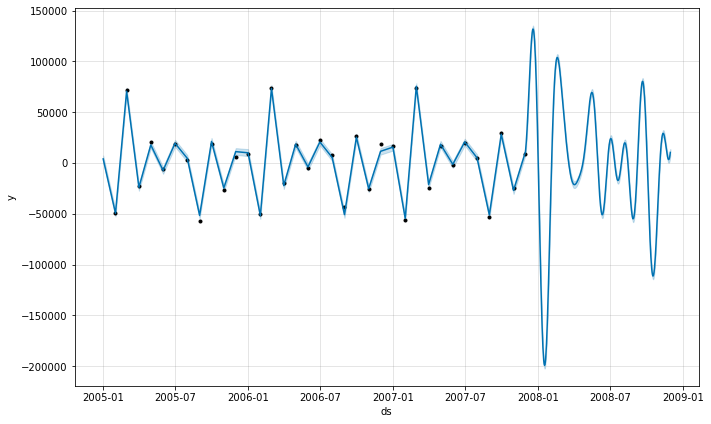

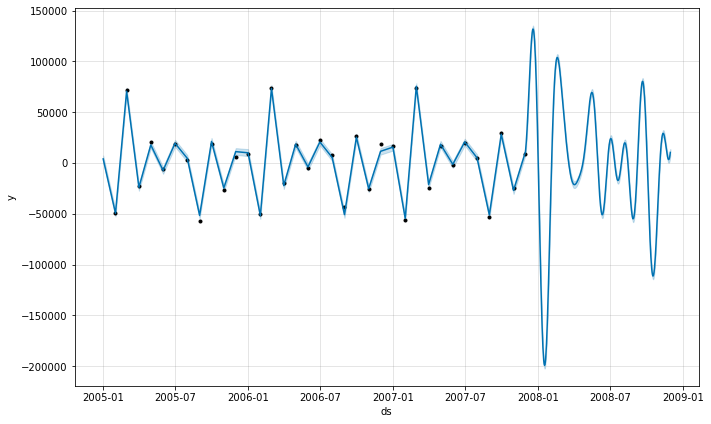

In [71]:
# Plot Our Predictions
m.plot(prediction)

#### Narrative
+ A Trending data
+ Black dots : the actual data points in our dataset.
+ Deep blue line : the predicted forecast/the predicted values
+ Light blue line : the boundaries

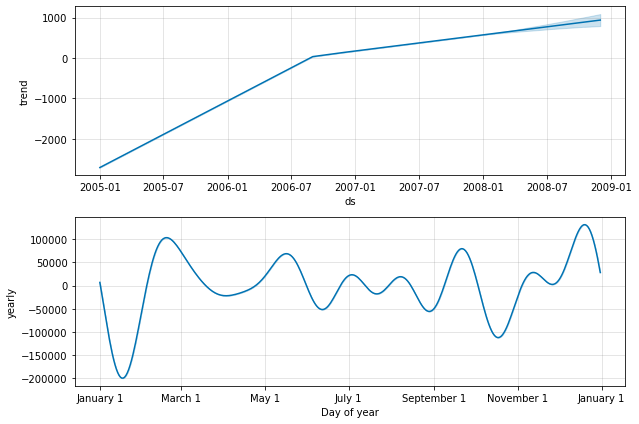

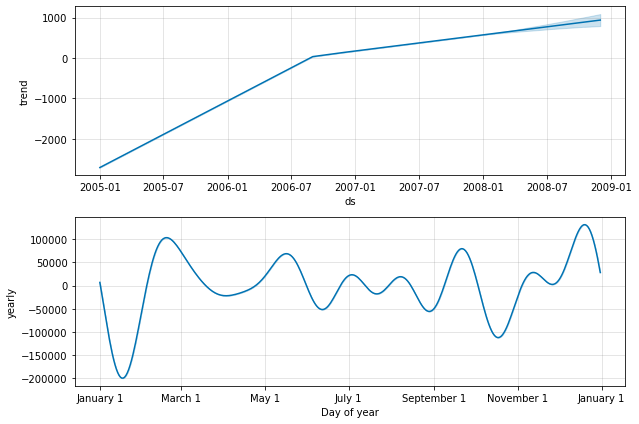

In [72]:
# Visualize Each Component [Trends,Weekly]
m.plot_components(prediction)

### Cross Validation
+ For measuring forecast error by comparing the predicted values with the actual values
+ initial:the size of the initial training period
+ period : the spacing between cutoff dates
+ horizon : the forecast horizon

In [73]:
# Load Pkgs
from fbprophet.diagnostics import cross_validation

In [74]:
new_df.shape

(36, 2)

In [75]:
cv = cross_validation(m,initial='36 days',period='180 days',horizon="365 days")

INFO:fbprophet:Making 4 forecasts with cutoffs between 2005-06-09 00:00:00 and 2006-12-01 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


In [76]:
# View CV Data
cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2005-07-01,-4.640560e+05,-4.640560e+05,-4.640560e+05,18766.0,2005-06-09
1,2005-08-01,-1.492940e+05,-1.492940e+05,-1.492940e+05,2943.0,2005-06-09
2,2005-09-01,-1.445611e+06,-1.445611e+06,-1.445611e+06,-56651.0,2005-06-09
3,2005-10-01,2.108613e+06,2.108613e+06,2.108613e+06,18459.0,2005-06-09
4,2005-11-01,-1.559250e+06,-1.559250e+06,-1.559250e+06,-26574.0,2005-06-09


#### Performance Metrics


In [77]:
from fbprophet.diagnostics import performance_metrics

In [78]:
df_perf = performance_metrics(cv)

In [79]:
df_perf.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,4.799150e+11,692758.996160,449371.887993,42.908381,13.196721,0.0
1,53 days,4.274298e+11,653781.146034,366725.638996,49.408369,26.196696,0.0
2,57 days,9.584921e+10,309595.234293,192078.067356,16.108402,6.327547,0.0
3,58 days,9.586597e+10,309622.304574,192593.033482,16.519943,7.150628,0.0
4,62 days,9.596935e+10,309789.202656,197471.057949,16.598371,7.150628,0.0


### Visualizing Performance Metrics

In [80]:
from fbprophet.plot import plot_cross_validation_metric

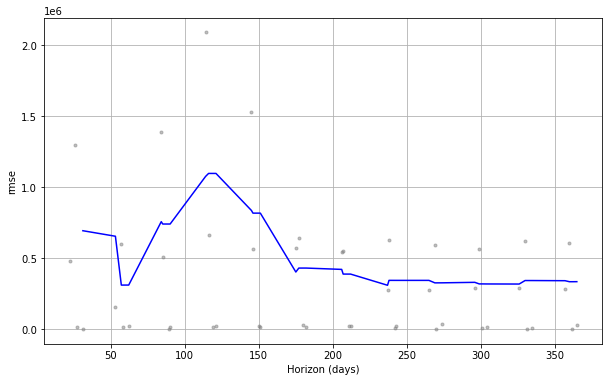

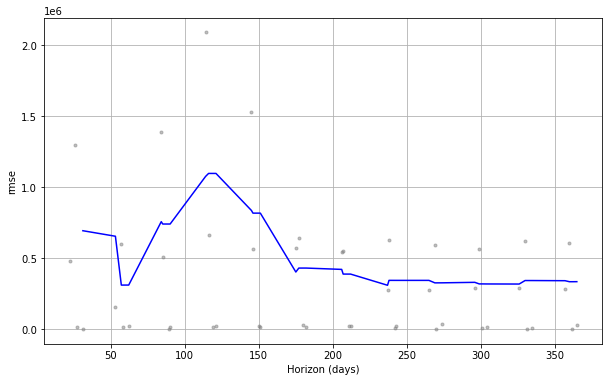

In [81]:
plot_cross_validation_metric(cv,metric='rmse')

### Working With Non Stationary Data

In [82]:
df.head()

,Dates,no_of_flights
0,2005-01-01,594924
1,2005-02-01,545332
2,2005-03-01,617540
3,2005-04-01,594492
4,2005-05-01,614802


In [83]:
# Non Stationary
ns_df = df

In [84]:
# Works with a ds and y column names
ns_df.rename(columns={'Dates':'ds','no_of_flights':'y'},inplace=True)

In [85]:
ns_df.head()

,ds,y
0,2005-01-01,594924
1,2005-02-01,545332
2,2005-03-01,617540
3,2005-04-01,594492
4,2005-05-01,614802


<AxesSubplot:>

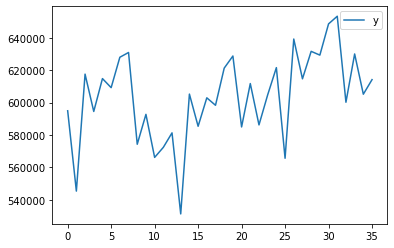

In [86]:
ns_df.plot()

In [87]:
# Build our model
model2 = Prophet()

In [88]:
# Fit our Mode to our Data
model2.fit(ns_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [89]:
# Create Future Dates of 360 days
future_dates2 = model2.make_future_dataframe(periods=365)

In [90]:
# Make Prediction with our Model
prediction2 = model2.predict(future_dates2)

In [91]:
prediction2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-01,592724.358335,593416.783741,595841.231266,592724.358335,592724.358335,1966.605417,1966.605417,1966.605417,1966.605417,1966.605417,1966.605417,0.0,0.0,0.0,594690.963752
1,2005-02-01,594503.803210,544369.354420,546704.479966,594503.803210,594503.803210,-48987.793768,-48987.793768,-48987.793768,-48987.793768,-48987.793768,-48987.793768,0.0,0.0,0.0,545516.009442
2,2005-03-01,596111.043756,616285.479263,618757.185585,596111.043756,596111.043756,21457.458183,21457.458183,21457.458183,21457.458183,21457.458183,21457.458183,0.0,0.0,0.0,617568.501940
3,2005-04-01,597890.488665,594057.860685,596566.126800,597890.488665,597890.488665,-2616.461110,-2616.461110,-2616.461110,-2616.461110,-2616.461110,-2616.461110,0.0,0.0,0.0,595274.027555
4,2005-05-01,599612.532150,613412.441813,615887.988498,599612.532150,599612.532150,15105.598912,15105.598912,15105.598912,15105.598912,15105.598912,15105.598912,0.0,0.0,0.0,614718.131061


#### Narrative
+ yhat : the predicted forecast
+ yhat_lower : the lower border of the prediction
+ yhat_upper: the upper border of the prediction

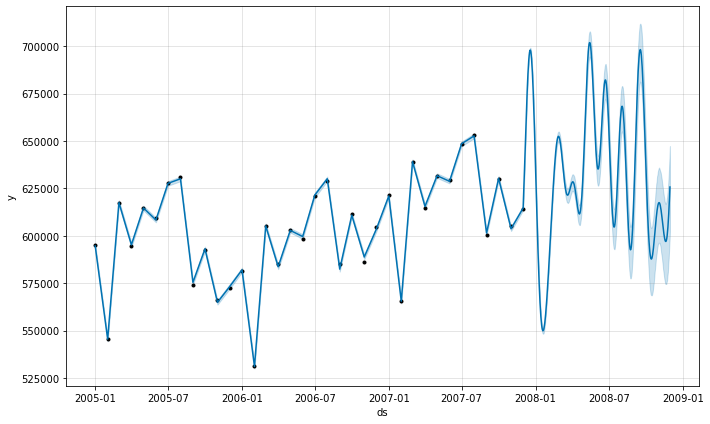

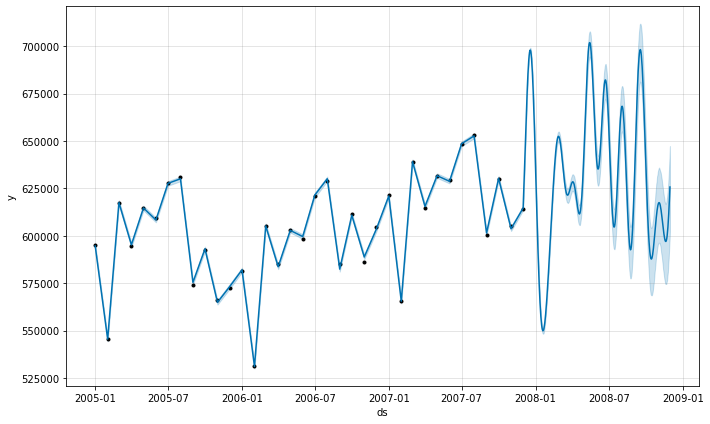

In [92]:
# Plot Our Predictions
model2.plot(prediction2)

#### Narrative
+ A Trending data
+ Black dots : the actual data points in our dataset.
+ Deep blue line : the predicted forecast/the predicted values
+ Light blue line : the boundaries

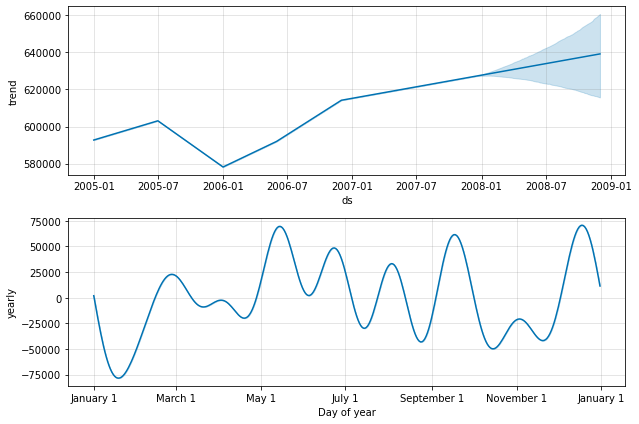

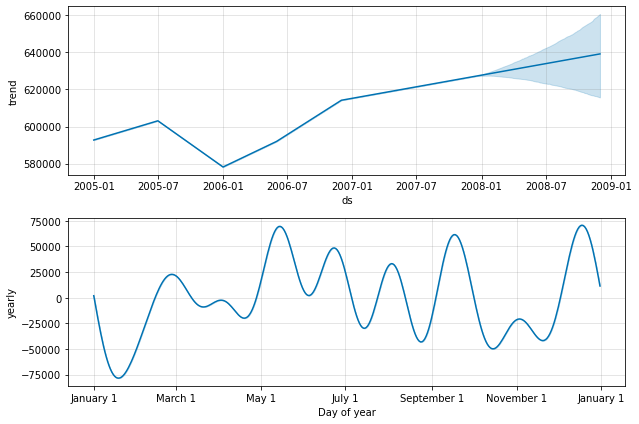

In [93]:
# Visualize Each Component [Trends,Weekly]
model2.plot_components(prediction2)